# Parkinson's Disease Prediction  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
# Read data
df = pd.read_csv("/content/parkinsons.data")
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# Getting the dependent and independent variables from dataset
X = df.loc[:,df.columns!='status'].values[:,1:]
y = df.loc[:,'status'].values

In [4]:
print(X)

[[119.992 157.302 74.997 ... 0.266482 2.3014419999999998 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.33263400000000004]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.6797720000000003
  0.13172799999999998]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]


In [5]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


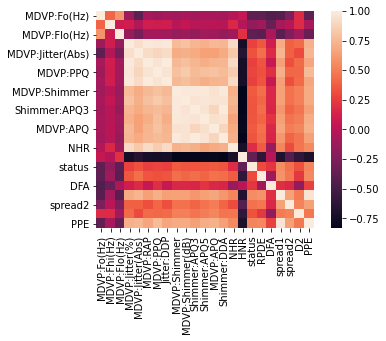

In [6]:
# Heatmap visulisation for each attribute coefficient correlation.
import seaborn as sb
corr_map=df.corr()
sb.heatmap(corr_map,square=True)

In [7]:
# Counting the zeros and ones in status
print(y[y==1].shape[0])
print(y[y==0].shape[0])

147
48


In [25]:
# Splitting the dataset into Training and Testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [29]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_

In [28]:
print(variance)

[5.91346085e-01 1.07772972e-01 7.40259351e-02 6.47181708e-02
 4.55376644e-02 3.51078880e-02 2.62705396e-02 1.55499167e-02
 1.24788747e-02 9.99771631e-03 6.10296524e-03 4.35400136e-03
 2.74437478e-03 1.40143920e-03 8.52169246e-04 7.43119433e-04
 5.31123973e-04 2.67317777e-04 1.56552360e-04 4.11599897e-05
 1.33706152e-08 1.41671080e-09]


In [30]:
# Using XGBoost Classifier to train the model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
#fitting the data in random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifi3 = RandomForestClassifier(n_estimators=16,criterion = "entropy",random_state=0)
classifi3.fit(X_train,y_train)

#predicting reults
y2_pred = classifi3.predict(X_test)

In [37]:
# confusion matrix for random forest classifier
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y2_pred)
print(cm)

[[10  0]
 [ 1 28]]


In [33]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10  0]
 [ 1 28]]


In [34]:
print(accuracy_score(y_test,y2_pred)*100)

97.43589743589743


In [38]:
print(accuracy_score(y_test,y_pred)*100)

97.43589743589743


In [39]:
# Creating a pickle file
import pickle
with open('parkinson_model.pkl','wb') as f:
    pickle.dump(classifier,f)